# Iris dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [140]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
print('Iris objects:', iris.keys())
print(iris.DESCR)

Iris objects: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (h

## k-means clustering

Fit kmeans 3 clusters using sepal length (0) and petal length (2)

In [186]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, n_init='auto')
model.fit(iris.data[:, [0, 2]]) # Sepal Lenght, Petal Lenght
# Predict 3 clusters of the training data.
labels = model.predict(iris.data[:, [0, 2]])

Centroids:
(6.839024390243902, 5.678048780487805) (5.007843137254902, 1.492156862745098) (5.874137931034483, 4.393103448275863)


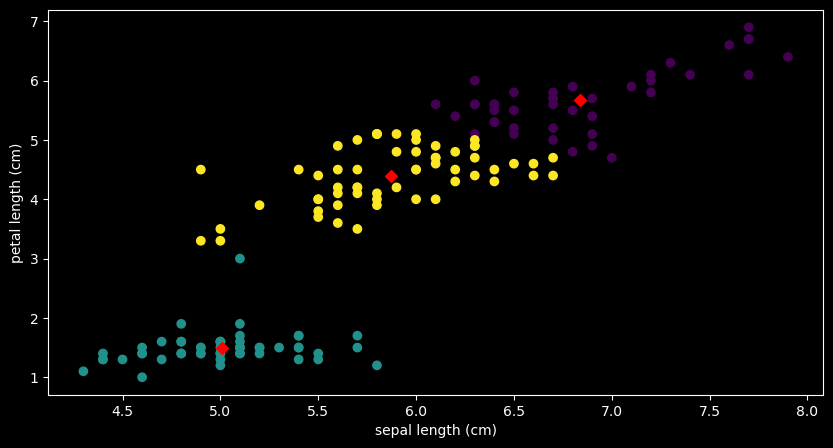

In [187]:
from matplotlib import pyplot as plt
plt.style.use('dark_background')
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.scatter(x=iris.data[:,0], y=iris.data[:,2], c=labels)
centroids_x = model.cluster_centers_[:,0]
centroids_y = model.cluster_centers_[:,1]
print('Centroids:')
print(*zip(centroids_x, centroids_y))
axes.scatter(centroids_x, centroids_y, marker='D', c='r')
axes.set_xlabel(iris.feature_names[0])
axes.set_ylabel(iris.feature_names[2])
plt.show()

## Evaluating a clustering

### Crosstab of labels and species

In [188]:
import pandas as pd
df = pd.DataFrame({'labels': labels, 'species': iris.target})

In [189]:
ct = pd.crosstab(df['labels'], df['species'])
ct

species,0,1,2
labels,,,
0,0,4,37
1,50,1,0
2,0,45,13


### Measuring clustering quality

Inertia measures clustering quality
* Measures how spread out the clusters are (lower is better)
* Distance from each sample to centroid of its cluster

In [190]:
model.inertia_

53.809978644106934

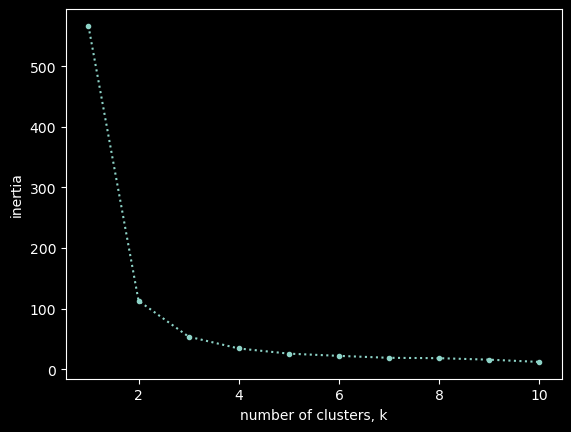

In [191]:
inertias = np.array([[k, KMeans(n_clusters=k, n_init='auto').fit(iris.data[:, [0, 2]]).inertia_] for k in range(1,11)])
plt.plot(inertias[:,0], inertias[:,1], ':.')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

# Grains dataset

## How many clusters of grain?

https://archive.ics.uci.edu/ml/datasets/seeds

In [192]:
grains = pd.read_csv('Grains/seeds.zip', header=None)\
    .set_axis(['area', 'perimeter', 'compactness', 'kernel_lenght', 'kernel_width',
               'asymmetry_coefficient', 'kernel_groove_lenght', 'variety'], axis=1)
grains

,area,perimeter,compactness,kernel_lenght,kernel_width,asymmetry_coefficient,kernel_groove_lenght,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


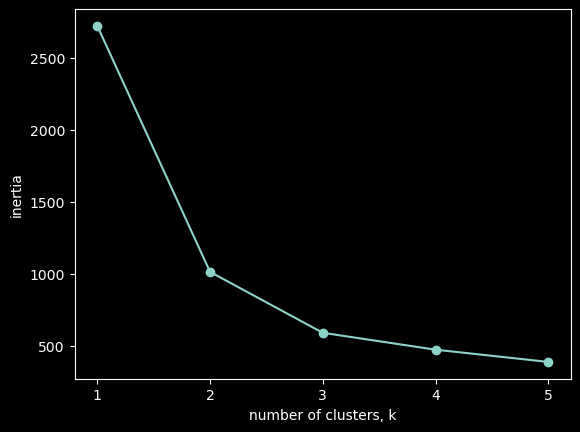

In [150]:
samples = grains.iloc[:, :-1]
ks = range(1, 6)
inertias = [KMeans(n_clusters=k, n_init='auto').fit(samples).inertia_ for k in ks]
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Evaluating the grain clustering

In [151]:
varieties = grains.iloc[:,-1]
model = KMeans(n_clusters=3, n_init='auto')
labels = model.fit_predict(samples)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,1,2,3
labels,,,
0,12,0,70
1,1,60,0
2,57,10,0


Inertia

In [155]:
model.inertia_

588.7819921777436

# Wines dataset

In [219]:
wines = pd.read_csv('wine.zip')
samples = wines.iloc[:,2:]
display(samples)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Statistics

In [220]:
samples.describe().iloc[1:,:].style.bar(axis=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [221]:
# import seaborn as sns
# sns.pairplot(samples, markers='.', kind="reg", plot_kws={'line_kws':{'color':'red'}})
# plt.show()

## Clustering without scaling

In [222]:
# model = KMeans(n_clusters=3, n_init='auto')
# model.fit(samples)
model = KMeans(n_clusters=3, n_init='auto')
model.fit(samples)
labels = model.predict(samples)
df = pd.DataFrame({'labels': labels, 'varieties': wines.class_label})
ct = pd.crosstab(df.labels, df.varieties)
display(ct)
print(f'Inertia: {model.inertia_}')

varieties,1,2,3
labels,,,
0,31,7,11
1,1,64,37
2,27,0,0


Inertia: 2633555.332409338


Feature variances

In [223]:
samples.var()

alcohol                     0.659062
malic_acid                  1.248015
ash                         0.075265
alcalinity_of_ash          11.152686
magnesium                 203.989335
total_phenols               0.391690
flavanoids                  0.997719
nonflavanoid_phenols        0.015489
proanthocyanins             0.327595
color_intensity             5.374449
hue                         0.052245
od280                       0.504086
proline                 99166.717355
dtype: float64

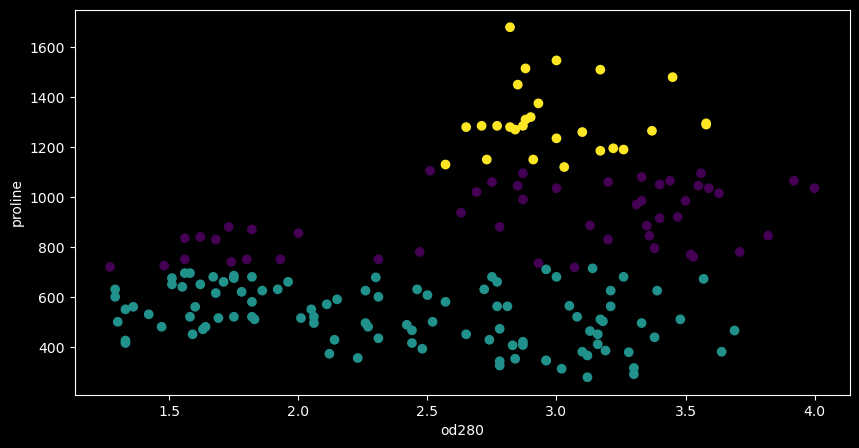

In [224]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.scatter(samples.od280, samples.proline, c=labels)
axes.set_xlabel('od280')
axes.set_ylabel('proline')
plt.show()

## Clustering with scaling

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
samples_scaled = scaler.transform(samples)

In [226]:
# variances
print(np.var(samples_scaled, axis=0).tolist())

[1.0, 1.0000000000000002, 1.0000000000000002, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 0.9999999999999997, 1.0, 1.0, 1.0, 1.0]


In [227]:
model = KMeans(n_clusters=3, n_init='auto')
labels = model.fit_predict(samples_scaled) 
df = pd.DataFrame({'labels': labels, 'varieties': wines.class_label})
ct = pd.crosstab(df.labels, df.varieties)
display(ct)
print(f'Inertia: {model.inertia_}')

varieties,1,2,3
labels,,,
0,0,3,48
1,59,5,0
2,0,63,0


Inertia: 1279.7311231046358


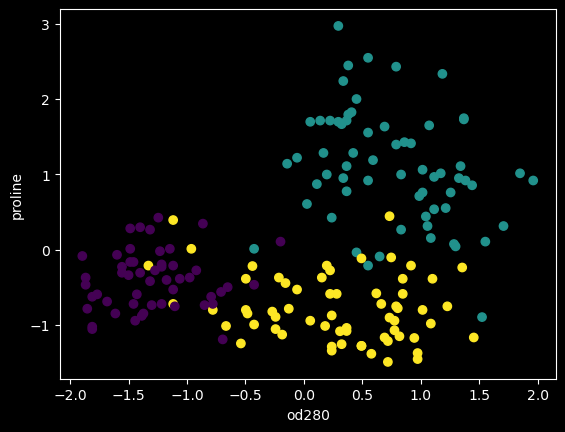

In [229]:
plt.scatter(samples_scaled[:,11], samples_scaled[:,12], c=labels)
plt.xlabel('od280')
plt.ylabel('proline')
plt.show()

# Fish

http://jse.amstat.org/jse_data_archive.htm

```
VARIABLE DESCRIPTIONS:

1  Obs       Observation number ranges from 1 to 159
2  Species   (Numeric)
        Code Finnish  Swedish    English        Latin      
         1   Lahna    Braxen     Bream          Abramis brama
         2   Siika    Iiden      Whitewish      Leusiscus idus
         3   Saerki   Moerten    Roach          Leuciscus rutilus
         4   Parkki   Bjoerknan  ?              Abramis bjrkna
         5   Norssi   Norssen    Smelt          Osmerus eperlanus
         6   Hauki    Jaedda     Pike           Esox lucius
         7   Ahven    Abborre    Perch          Perca fluviatilis

3  Weight      Weight of the fish (in grams)
4  Length1     Length from the nose to the beginning of the tail (in cm)
5  Length2     Length from the nose to the notch of the tail (in cm)
6  Length3     Length from the nose to the end of the tail (in cm)
7  Height%     Maximal height as % of Length3
8  Width%      Maximal width as % of Length3
9  Sex         1 = male 0 = female
```

In [231]:
fish = pd.read_csv('fish.zip', header=None).set_axis(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height%', 'Width%'], axis=1)
fish

,Species,Weight,Length1,Length2,Length3,Height%,Width%
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...,...
80,Pike,950.0,48.3,51.7,55.1,16.2,11.2
81,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
82,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
83,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [232]:
samples = fish.iloc[:, 1:]
samples

,Weight,Length1,Length2,Length3,Height%,Width%
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1
...,...,...,...,...,...,...
80,950.0,48.3,51.7,55.1,16.2,11.2
81,1250.0,52.0,56.0,59.7,17.9,11.7
82,1600.0,56.0,60.0,64.0,15.0,9.6
83,1550.0,56.0,60.0,64.0,15.0,9.6


## k-means clustering

In [239]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=7, n_init='auto')
pipeline = make_pipeline(scaler, kmeans)
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=7, n_init='auto'))])

## Evaluating the fish clustering

In [240]:
import pandas as pd
pipeline.fit(samples)
labels = pipeline.predict(samples)
df = pd.DataFrame({'labels': labels, 'species':fish.iloc[:,0]})
display(pd.crosstab(df.labels, df.species))

species,Bream,Pike,Roach,Smelt
labels,,,,
0,22,0,1,0
1,0,5,0,0
2,0,0,1,3
3,0,12,0,0
4,0,0,18,0
5,0,0,0,11
6,12,0,0,0


In [241]:
pipeline[1].inertia_

35.8367530652516

# Stocks

In [250]:
stocks = pd.read_csv('company-stock-movements-2010-2015-incl.zip').rename(columns={'Unnamed: 0': 'id'}).set_index('id')
stocks.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
id,,,,,,,,,,,,,,,,,,,,,
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


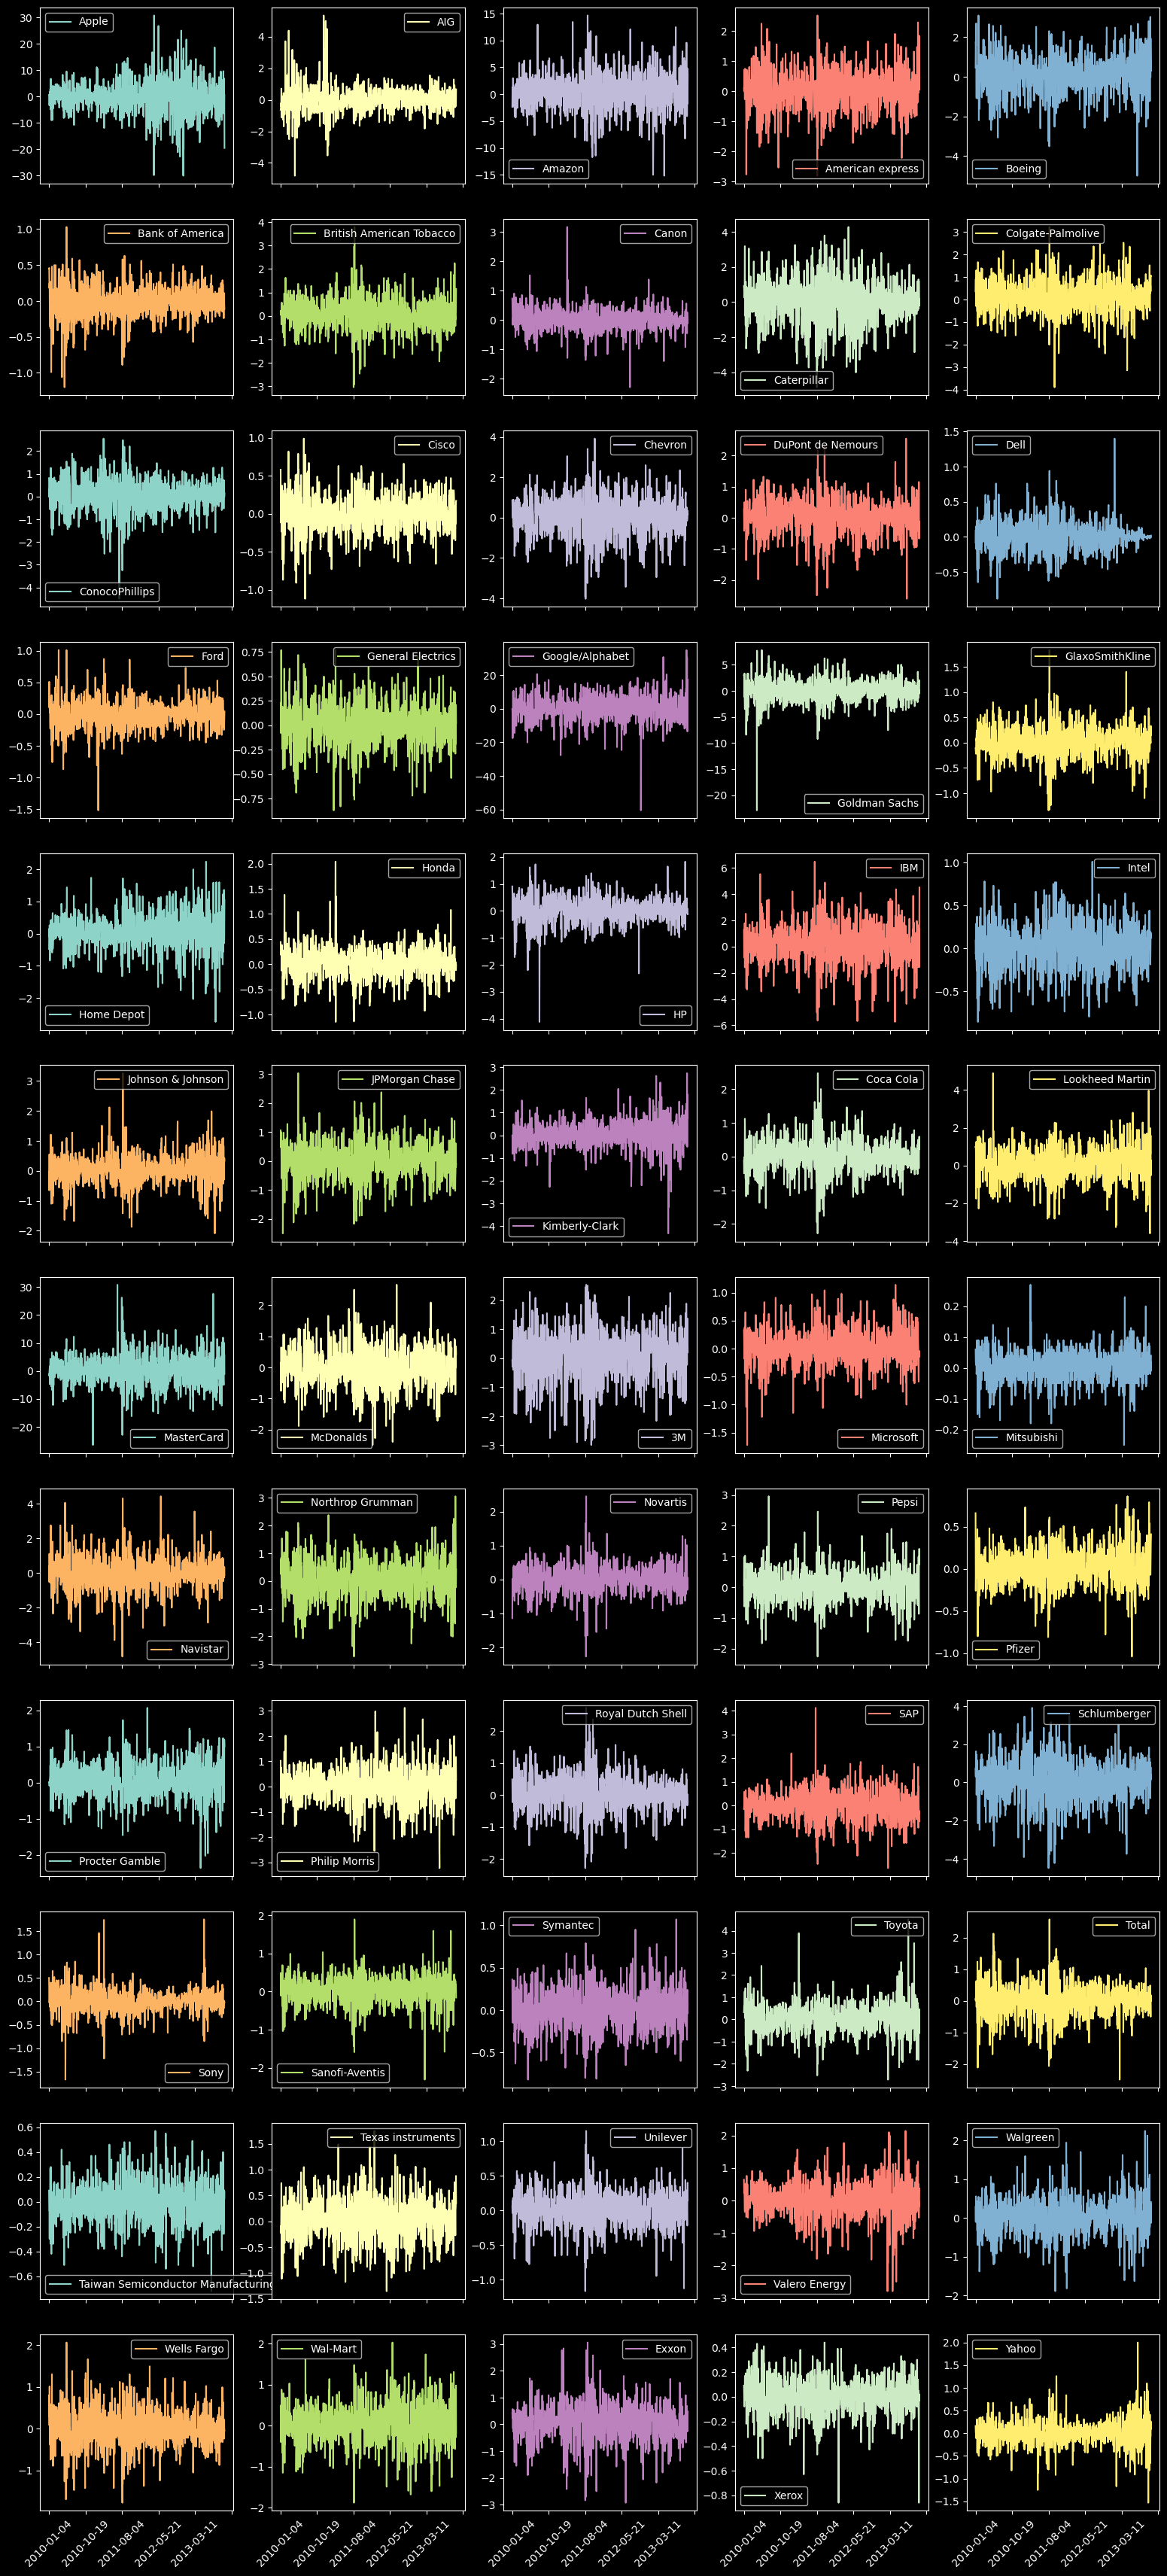

In [251]:
stocks.T.plot(figsize=(19.2,10.8*4), subplots=True, layout=(12,5), sharex=True, rot=45)
plt.show()

## Clustering stocks using Kmeans after normalizing each sample

Clustering stock movement time-series requires normalization of the rows because of different (price) movement scales 

In [252]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
kmeans = KMeans(n_clusters=10, n_init='auto')
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(stocks.values)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10, n_init='auto'))])

In [253]:
labels = pipeline.predict(stocks.values)
print(f'Inertia: {pipeline[1].inertia_}')

Inertia: 25.827820127638468


## Which stocks move together?

In [254]:
df = pd.DataFrame({'labels': labels, 'companies': stocks.index.tolist()})
print(df.sort_values('labels'))

    labels                           companies
0        0                               Apple
2        0                              Amazon
17       0                     Google/Alphabet
24       1                               Intel
51       1                   Texas instruments
50       1  Taiwan Semiconductor Manufacturing
13       2                   DuPont de Nemours
8        2                         Caterpillar
53       2                       Valero Energy
35       2                            Navistar
59       2                               Yahoo
39       3                              Pfizer
28       3                           Coca Cola
38       3                               Pepsi
6        3            British American Tobacco
25       3                   Johnson & Johnson
37       3                            Novartis
52       3                            Unilever
41       3                       Philip Morris
46       3                      Sanofi-Aventis
54       3   

## Which stocks moves together with Amazon

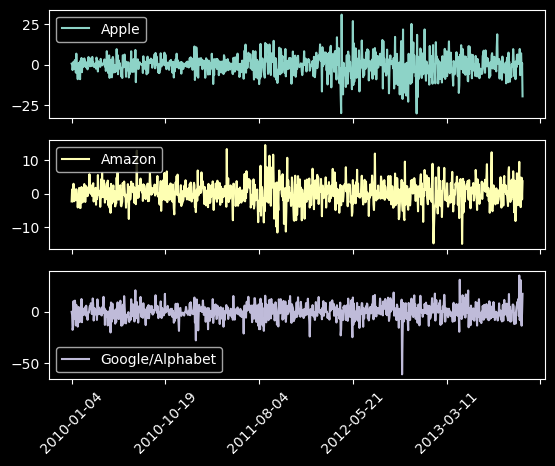

In [255]:
amazon_label = df.loc[df.companies=='Amazon', 'labels'].iloc[0]
stocks[(df.labels==amazon_label).values].T.plot(subplots=True, sharex=True, rot=45)
plt.show()